# Sky Mermaids from Narnia to Neverland

## Note

-----

## Scenario

A company specialises in chartering flights between Narnia and Neverland each year.
In 20XX, the the company is scheduled to put on 18 flights.
The company is concerned about the rise in sky mermaids that have been spotted by the crew of the flights, as a collision could be disasterous.
The flight crew estimates that there is a 17% chance of spotting a sky mermaid during a flight.
It maybe assumed that the event of spotting a sky mermaid is independent of any other event.

-----

In [1]:
# impot packages
library(ggplot2)

## (a)

> What is the model that describes the number of sky mermaids spotted out of the 18 flights?

Let $X$ be a random variable that represents the number of times a sky mermaid is spotted during the flights from Narnia to Neverland over the year.
Then $X$ is modelled by a binomial distribution, with parameters $n=18$ and $p=0.17$, so $X \sim B(18,0.17)$.

-----

### (b)

> Construct a table showing the p.d.f. and c.d.f. of $X$.

We'll first declare a list with range $\{0, \ldots , 18\}$.

In [2]:
x <- c(0:18)

Declare a `data.frame` to hold `x`.

In [3]:
df_mermaids <- data.frame(x)

Declare two new columns for the `df_mermaids`:
One will hold the p.m.f., the other for c.d.f.

In [4]:
df_mermaids$pmf <- dbinom(x=x, size = 18, prob = 0.17)

In [5]:
df_mermaids$cdf <- pbinom(q=x, size = 18, prob = 0.17)

**Table 1**.

In [6]:
df_mermaids

x,pmf,cdf
<int>,<dbl>,<dbl>
0,3.494666e-02,0.03494666
1,1.288395e-01,0.16378615
2,2.243049e-01,0.38809104
3,2.450238e-01,0.63311487
4,1.881960e-01,0.82131087
5,1.079293e-01,0.92924015
6,4.789633e-02,0.97713647
7,1.681730e-02,0.99395377
8,4.736197e-03,0.99868997


-----

### (c)

> Plot the probability distribution of $X$.

We'll use the distribution using `ggplot.geom_col()` to plot the distribution.

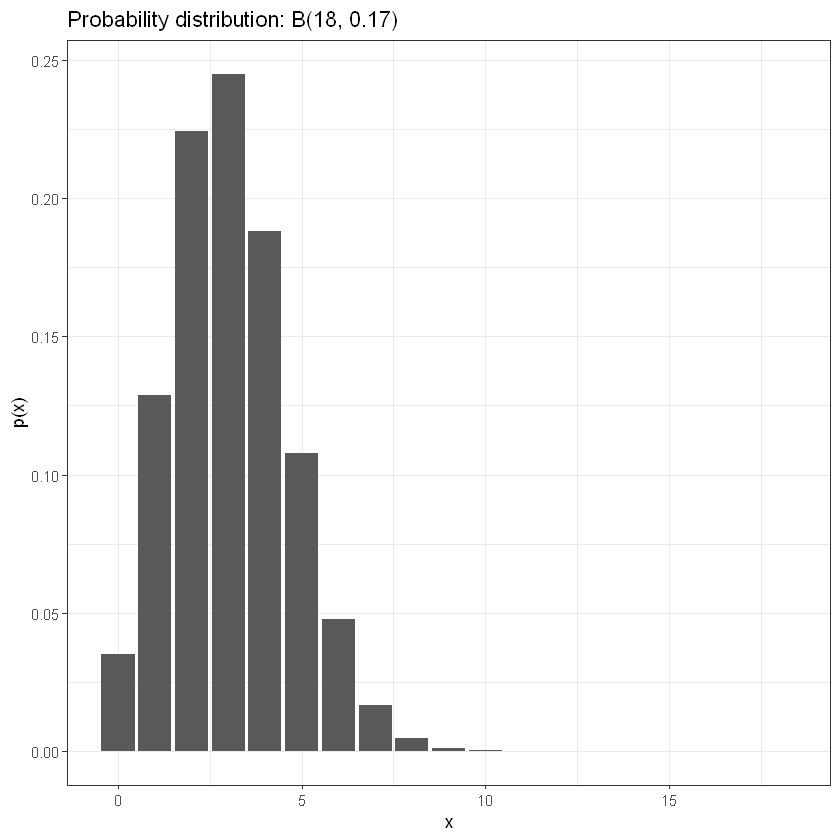

In [7]:
ggplot(data=df_mermaids) +
  geom_col(mapping = aes(x = x, y = pmf)) +
  theme_bw() +
  labs(
      title = "Probability distribution: B(18, 0.17)",
      y = "p(x)"
  )

-----

### (d)

> Calculate the mean and variance of the distribution

I have not found a satisfactory means to calculate $\mu$ and $\sigma^{2}$, save for defining the formula.
I did not find this particularly interesting, so the two summary statistics are left out.

-----

### (e)

> What is the probability that 5 sky mermaids will be spotted in 20XX, rounded to 3dp?

$$
P(X=5) = p(5) = \binom{18}{5} (0.17)^{5} (0.83)^{13} = \ldots
$$

In [8]:
dbinom(x = 5, size = 18, prob = 0.17)

[1] 0.1079293

-----

### (f)

> What is the probability at most 4 sky mermaids will be spotted in 20XX?

$$
P(X \leq 4) = F(4) = \sum_{k = 0}^{4} \binom{18}{k} (0.17)^{k} (0.83)^{18 - k} = \ldots
$$

In [9]:
pbinom(q = 4, size = 18, prob = 0.17)

[1] 0.8213109

-----

### (g)

> What is the probability that more than 4 sky mermaids will be spotted in 20XX?

$$
P(X > 4) = 1 - F(4) = \sum_{k = 5}^{18} \binom{18}{k} (0.17)^{k} (0.83)^{18 - k} = \ldots
$$

We will use the `pbinom()` function again, this time setting the parameter `lower.tail` to `False`.

Note, this is a sanity check.
We are hoping the method returns approximately 0.179.

In [10]:
pbinom(q = 4, size = 18, prob = 0.17, lower.tail = FALSE)

[1] 0.1786891

-----

## (2)

The company is interested in modelling which of the flights will spot the first sky mermaid of the year.

-----

### (a)

> What is the model for the distribution of sky mermaid spotting?

Let $Y$ be a random variable that represents that first flight from Narnia to Neverland where a sky mermaid is spotted.
Then $Y$ is modelled by a geometric distribution, with parameter $p=0.17$, so  $Y \sim G(0.17)$.

------

### (b)

> Construct a table showing the p.d.f. and c.d.f. of $Y$.

We'll follow the same steps as we did in **1(b)**.

Note, **R** defines the parameter $x$ as just the number of failures, rather than **M248's** definition as the trial number of the *first success*.
As such, we define the array as running $\{0, \ldots, 17\}$, where 0 represents success in the first trial (so zero failures), etc.

In [11]:
y <- c(0:17)

In [12]:
df_first_mermaid <- data.frame(y)

In [13]:
df_first_mermaid$pmf <- dgeom(x=y, prob = 0.17)

In [14]:
df_first_mermaid$cdf <- pgeom(q=y, prob = 0.17)

In [15]:
df_first_mermaid

y,pmf,cdf
<int>,<dbl>,<dbl>
0,0.170000000,0.1700000
1,0.141100000,0.3111000
2,0.117113000,0.4282130
3,0.097203790,0.5254168
4,0.080679146,0.6060959
5,0.066963691,0.6730596
6,0.055579863,0.7286395
7,0.046131287,0.7747708
8,0.038288968,0.8130597


-----

### (c)

> Plot the distribution of $Y$.

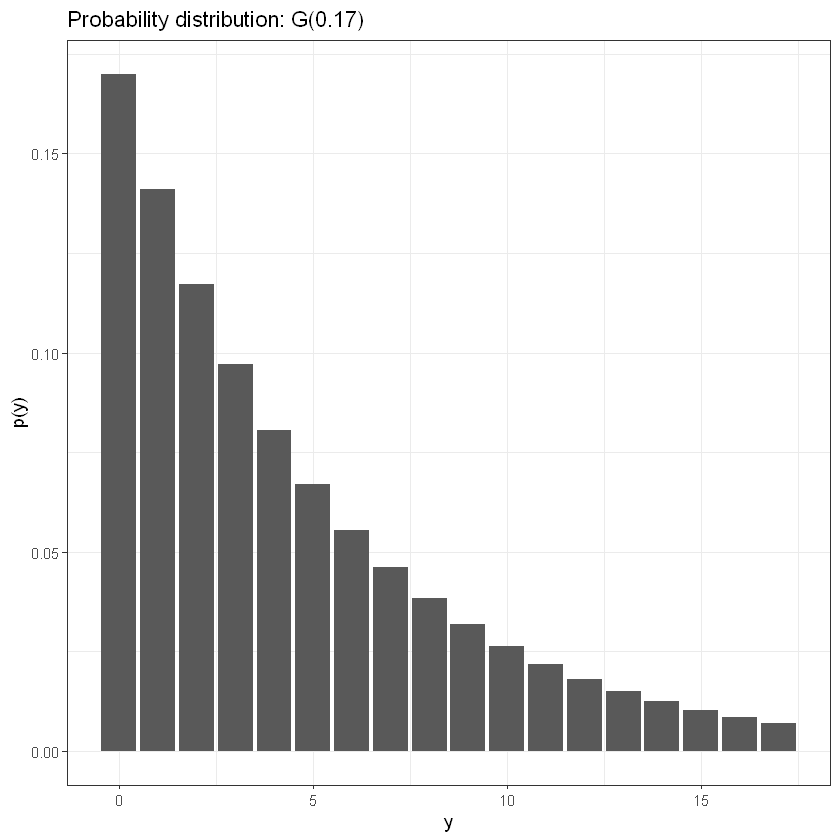

In [16]:
ggplot(data=df_first_mermaid) +
  geom_col(mapping = aes(x = y, y = pmf)) +
  theme_bw() +
  labs(
      title = "Probability distribution: G(0.17)",
      y = "p(y)"
  )

-----

### (d)

> Calculate the mean and variance of the distribution

I have not found a satisfactory means to calculate $\mu$ and $\sigma^{2}$, save for defining the formula.
I did not find this particularly interesting, so they two summary statistics are left out.

-----

### (e)

> What is the probability the first sky mermaid will be spotted in the 7th flight?

$$P(Y=7) = p(7) = (0.83)^{6} 0.17 = \ldots$$

Recall that we set parameter `x` to the *number of failures*

In [17]:
dgeom(x = 6, prob = 0.17)

[1] 0.05557986

------

### (f)

> What is the probability it will take no more than 5 flights to first spot a sky mermaid?

$$
P(Y \leq 5) = F(5) = 1 - 0.83^{5} = \ldots
$$

In [18]:
pgeom(q = 4, prob = 0.17)

[1] 0.6060959

-----

### (g)

> What is the probability it will take 7 or more flight to first spot a sky mermaid?

$$
P(Y \geq 7) = 1 - P(Y \leq 6) = 1 - F(6) = 1 - (1 - 0.83^{6}) = 0.83^{6} = \ldots
$$

We'll set parameter `q` to 5.

In [19]:
pgeom(q = 5, prob = 0.17, lower.tail = FALSE)

[1] 0.3269404